# ORIE 4580/5580/5581 Assignment 5

#### Students: London Brown (lmb395) and Katie Zelvin (klz24)

### Github link: [Github link](https://github.com/katiezelvin/orie4580-hw)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.

10λ = 6

λ = 6/10 = 3/5

Mλ = 28.8

M = 28.8/(3/5) = 48


<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.



In [ ]:
m = 10  #tagged birds
n = 20   #observed birds
x = 4 #tagged observed birds

m_hat = (m * n) / x
print(m_hat)

50.0


<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.
$$
P(Y = y) =
\begin{cases}
(1 - p)^y p, & y = 0, \dots, 39, \\
(1 - p)^{40}, & y = 40.
\end{cases}
$$


<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/HW5_ORIE4580/Soup_sales_data.csv'
data = pd.read_csv(file_path)
y = data['Y']

uncensored = y[y < 40]
censored = y[y == 40]

n1 = len(uncensored)
n2 = len(censored)
S = uncensored.sum()

p_hat = n1 / (n1 + S + 40 * n2)

print("MLE:", p_hat)


MLE: 0.02679658952496955


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

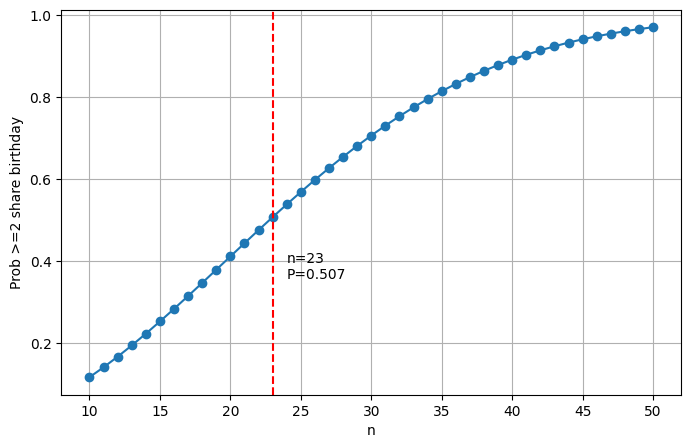

In [ ]:
import math
import matplotlib.pyplot as plt

#Expression for probability
def P_atleast2_share(n, days=365):
    p_no_share = 1.0
    for k in range(n):
        p_no_share *= (days - k) / days
    return 1 - p_no_share

ns = list(range(10, 51))

probs = [P_atleast2_share(n) for n in ns]

plt.figure(figsize=(8,5))
plt.plot(ns, probs, marker='o')
plt.xlabel("n")
plt.ylabel("Prob >=2 share birthday")
plt.grid(True)

first = next((n for n, p in zip(ns, probs) if p >= 0.5), None) #help from chatgpt for first item from generator
if first is not None:
    p50 = P_atleast2_share(first)
    plt.axvline(first, linestyle='--', color='red')
    plt.annotate(f"n={first}\nP={p50:.3f}",
                 xy=(first, p50),
                 xytext=(first+1, p50-0.15))

plt.show()

<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

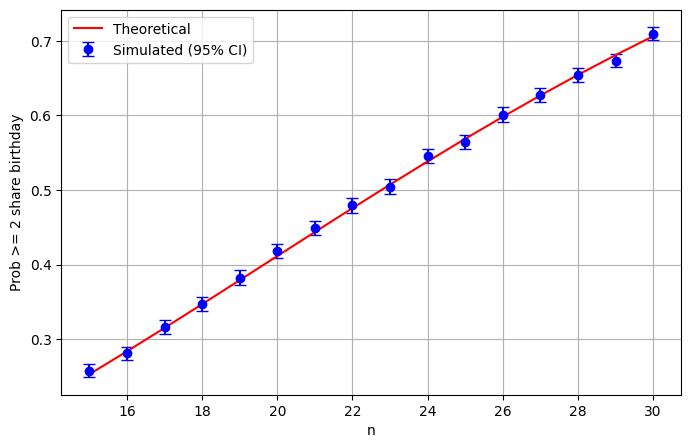

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats

# Helper function from example code
def plot_mean_and_ci(fig, data, alpha=0.95, plotCI=1):
    mean = np.mean(data)
    z = stats.norm.ppf(0.5 + alpha / 2.0)
    half_width_alpha = z * np.std(data, ddof=1) / np.sqrt(len(data))
    ucb = mean + half_width_alpha
    lcb = mean - half_width_alpha

    plt.axvline(mean, color='g', lw=2, label='Sample mean')
    if plotCI:
        plt.axvspan(lcb, ucb, alpha=0.3, color='y', label=f'{int(alpha*100)}% CI')

    return mean, half_width_alpha


def P_atleast2_share(n, days=365):
    p_no_share = 1.0
    for k in range(n):
        p_no_share *= (days - k) / days
    return 1 - p_no_share


def simulate_one_run(n, days=365):
    birthdays = np.random.randint(0, days, n)
    return len(birthdays) != len(set(birthdays))

ns = list(range(15, 31))
num_runs = 10000
simulated_means = []
ci_halfwidths = []

for n in ns:
    results = [simulate_one_run(n) for _ in range(num_runs)]
    mean = np.mean(results)
    z = stats.norm.ppf(0.975)
    se = np.sqrt(mean * (1 - mean) / num_runs)
    half_width = z * se
    simulated_means.append(mean)
    ci_halfwidths.append(half_width)


theoretical = [P_atleast2_share(n) for n in ns]

plt.figure(figsize=(8,5))
plt.errorbar(ns, simulated_means, yerr=ci_halfwidths, fmt='o', capsize=4, color='blue', label='Simulated (95% CI)')
plt.plot(ns, theoretical, '-r', label='Theoretical')
plt.xlabel("n")
plt.ylabel("Prob >= 2 share birthday")
plt.grid(True)
plt.legend()
plt.show()



<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

In [ ]:
## Plot histogram
from scipy.stats import expon, foldnorm, norm
import pandas as pd

#from example code Demo7
def emp_cdf(x, cont_corr=True):
    """
    Calculate the empirical cumulative distribution function (CDF) of a dataset.

    Parameters:
    x (array-like): The dataset for which to calculate the empirical CDF.
    cont_corr (bool, optional): Whether to apply continuity correction. Default is True.

    Returns:
    tuple: A tuple containing two arrays: the sorted dataset and the empirical CDF.
    """
    n = len(x)
    x_sort = np.sort(x)

    if cont_corr:
        # Apply continuity correction
        cdf = (np.arange(1, n + 1) - 0.5) / n
    else:
        # No continuity correction
        cdf = (1.0 * np.arange(1, n + 1)) / n

    return x_sort, cdf

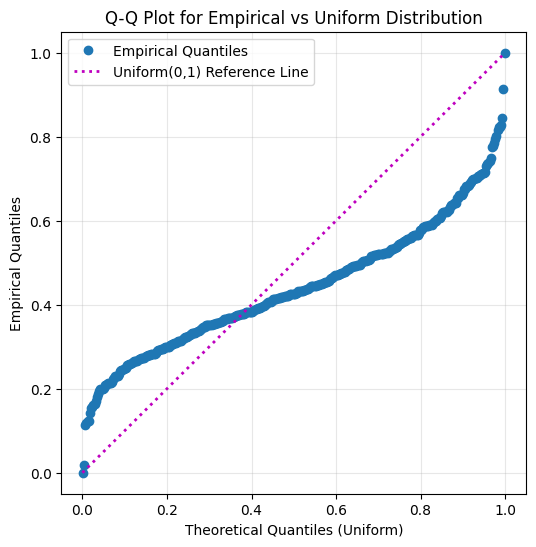

In [ ]:
## Q-Q plot
from scipy.stats import uniform

data = X['count'].astype(int).values # Convert 'count' column to integer type
data_norm = (data - np.min(data)) / (np.max(data) - np.min(data))
x_sort, ecdf = emp_cdf(data_norm)

theoretical_quantiles = uniform.ppf(ecdf)

plt.figure(figsize=(6, 6))
plt.plot(theoretical_quantiles, x_sort, 'o', label='Empirical Quantiles')
plt.plot([0, 1], [0, 1], 'm:', lw=2, label='Uniform(0,1) Reference Line')
plt.title("Q-Q Plot for Empirical vs Uniform Distribution")
plt.xlabel("Theoretical Quantiles (Uniform)")
plt.ylabel("Empirical Quantiles")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Ans.

<hr>


**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [ ]:
import numpy as np
#help from example code Demo7
# Sample size
n = len(data_norm)

# Minimum expected frequency
E_min = 6
k = int(n / E_min)

# Degrees of freedom
s = 0
df = k - s - 1

# Create equally spaced bins for Uniform(0,1)
bins = np.linspace(0, 1, k + 1)

# Compute observed histogram
obs, _ = np.histogram(data_norm, bins=bins)

# Expected frequency (equal for each bin)
exp = np.ones(k) * (n / k)

# Chi-squared statistic
D_2 = np.sum((obs - exp)**2 / exp)
print("Chi-Square Test statistic D^2 =", D_2)

Chi-Square Test statistic D^2 = 326.89041095890406


The KS statistic is D = 0.24289917


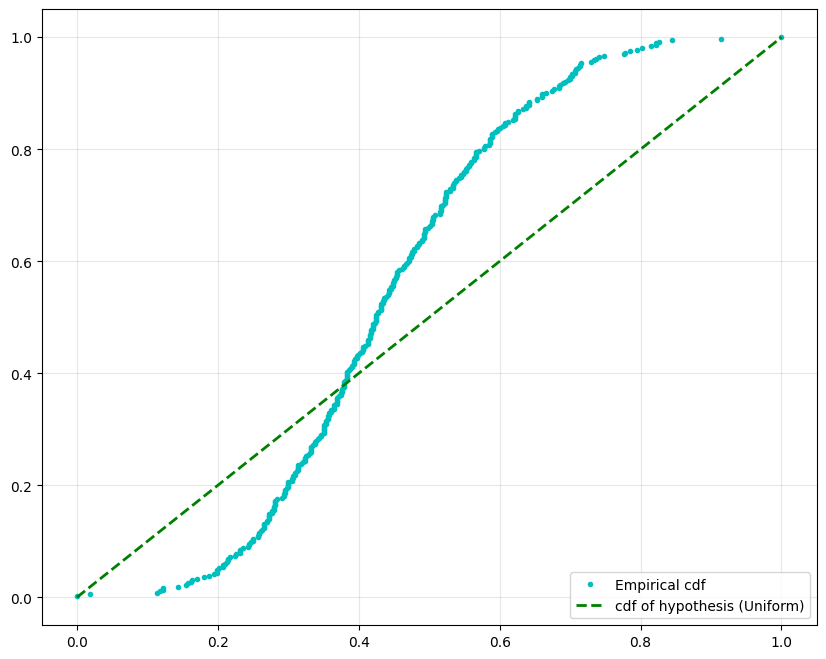

In [ ]:
## K-S test
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np

X_sort, X_ecdf = emp_cdf(data_norm, cont_corr=False)

# Plot the empirical CDF
plt.figure(figsize=[10, 8])
plt.step(X_sort, X_ecdf, 'c.', linewidth=1, where='post', label='Empirical cdf')

# Compute the theoretical CDF for Uniform(0,1)
Hyp_cdf = uniform.cdf(X_sort)  # uniform CDF from 0 to 1

# Plot the theoretical CDF
plt.plot(X_sort, Hyp_cdf, 'g--', linewidth=2, label='cdf of hypothesis (Uniform)')

# Compute KS statistic
D_KS = np.max(np.abs(Hyp_cdf - X_ecdf))
print("The KS statistic is D =", round(D_KS, 8))

plt.legend(loc=4)
plt.grid(alpha=0.3)
plt.show()


<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


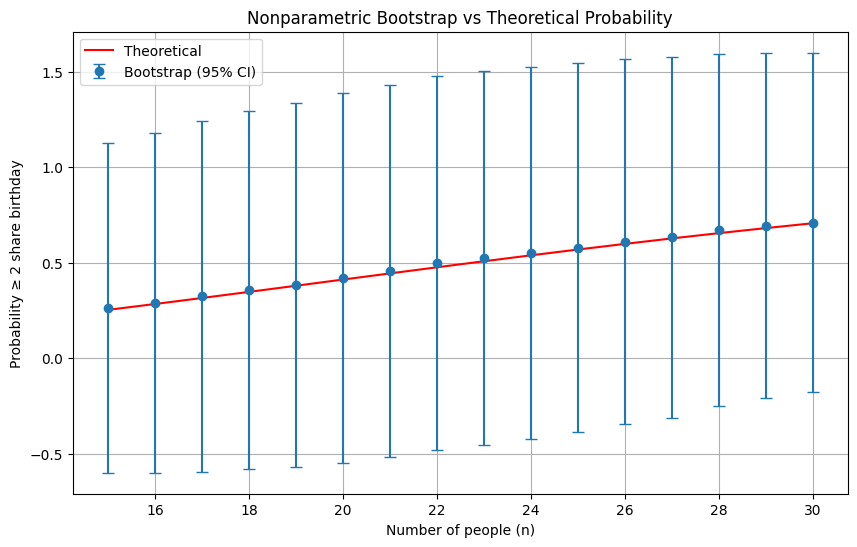

In [ ]:
#COME BACK TO THIS

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Nonparametric bootstrap function
def bootstrap_atleast2(data, n_people, num_bootstrap=10000):
    n_data = len(data)
    bootstrap_estimates = []

    for _ in range(num_bootstrap):
        # Sample n_people birthdays with replacement from data
        sample = np.random.choice(data, size=n_people, replace=True)
        # Check if there is at least one duplicate
        bootstrap_estimates.append(len(sample) != len(np.unique(sample)))

    return np.array(bootstrap_estimates)

days = 365
N = 10000
birthdays = np.random.randint(0, days, N)

ns = range(15, 31)
num_bootstrap = 10000
sim_means = []
ci_halfwidths = []

for n_people in ns:
    bst = bootstrap_atleast2(birthdays, n_people, num_bootstrap=num_bootstrap)
    mean = np.mean(bst)
    se = np.std(bst, ddof=1)  # bootstrap std
    # 95% CI using normal approximation
    z = stats.norm.ppf(0.975)
    half_width = z * se
    sim_means.append(mean)
    ci_halfwidths.append(half_width)

# Theoretical probability
def P_atleast2_share(n, days=365):
    p_no_share = 1.0
    for k in range(n):
        p_no_share *= (days - k) / days
    return 1 - p_no_share

theoretical = [P_atleast2_share(n) for n in ns]

# Plot results
plt.figure(figsize=(10,6))
plt.errorbar(ns, sim_means, yerr=ci_halfwidths, fmt='o', capsize=4, label='Bootstrap (95% CI)')
plt.plot(ns, theoretical, '-r', label='Theoretical')
plt.xlabel("Number of people (n)")
plt.ylabel("Probability ≥ 2 share birthday")
plt.title("Nonparametric Bootstrap vs Theoretical Probability")
plt.grid(True)
plt.legend()
plt.show()

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

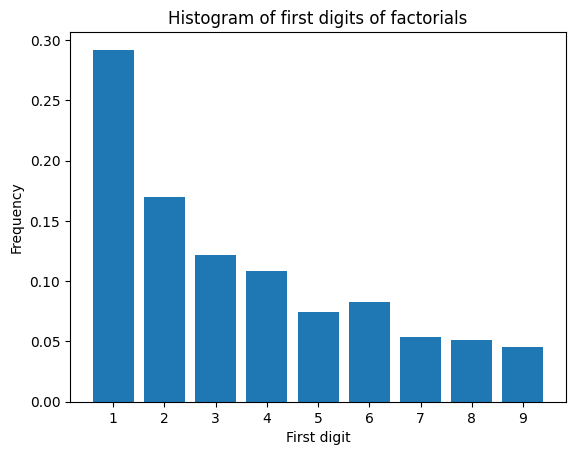

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial #had to change this line due to an error
n = 1500
fact_series = factorial(np.arange(n),exact=True)
first_digit = np.zeros(n)
for i in range(n):
 first_digit[i] = int(str(fact_series[i])[0])
digits = np.arange(1,10)
count = np.array([np.sum(first_digit==d) for d in digits])
frequency = count/n
plt.bar(digits, frequency)
plt.xticks(digits)
plt.xlabel("First digit")
plt.ylabel("Frequency")
plt.title("Histogram of first digits of factorials")
plt.show()



<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [ ]:
#help from demo code 7
n = np.size(first_digit)
E_min = 6.0
k = len(digits)
s=0
df= k-s-1
exp = np.ones(k)*n/k
obs = count
D_2 = np.sum((obs-exp)**2/exp)
print("The Chi-Square Test statistic is D^2 = " + str(D_2))

The Chi-Square Test statistic is D^2 = 670.8000000000002


<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [ ]:
#help from demo code 7
from scipy.stats import chi2
n = np.size(first_digit)
benford = np.log10(digits+1)-np.log10(digits)
exp = n*benford
obs = count
D_2 = np.sum((obs-exp)**2/exp)
k=len(digits)
s=0
df = k-s--1
print("The Chi-Square Test statistic is D^2 = " + str(D_2))

The Chi-Square Test statistic is D^2 = 9.456569118464648


Since $D^{2}$ =9.457, the data is modeled very well using Benford's Law, since a small $D^{2}$ indicates that that there are only small deviations from what the Law predicts.

<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

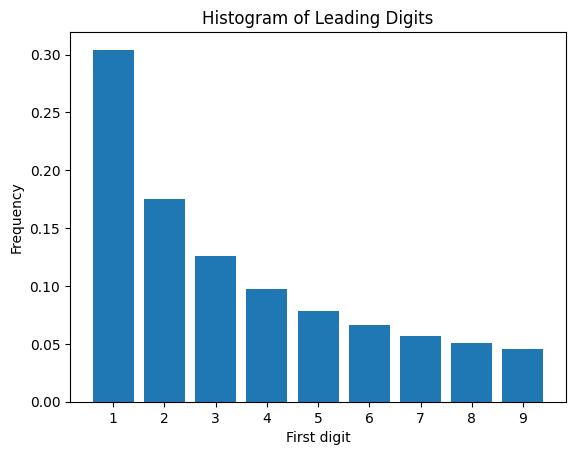

In [ ]:
import pandas as pd
df=pd.read_csv("us_pop.csv")
X = df.iloc[:,0].values
first_digit = np.zeros(len(X))
for i in range(len(X)):
  first_digit[i]=int(str(int(X[i]))[0])
digits = np.arange(1,10)
count = np.array([np.sum(first_digit==d) for d in digits])
n=np.sum(count)
frequency = count/n
plt.bar(digits, frequency)
plt.xticks(digits)
plt.xlabel("First digit")
plt.ylabel("Frequency")
plt.title("Histogram of Leading Digits")
plt.show()

In [ ]:
# help from demo code 7
n = np.size(first_digit)
E_min = 6.0
k = len(digits)
s=0
df= k-s-1
exp = np.ones(k)*n/k
obs = count
D_2 = np.sum((obs-exp)**2/exp)
print("The Chi-Square Test statistic is D^2 = " + str(D_2))

The Chi-Square Test statistic is D^2 = 50323.53572


In [ ]:
#help from demo code 7
from scipy.stats import chi2
n = np.size(first_digit)
benford = np.log10(digits+1)-np.log10(digits)
exp = n*benford
obs = count
D_2 = np.sum((obs-exp)**2/exp)
k=len(digits)
s=0
df = k-s-1
print("The Chi-Square Test statistic is D^2 = " + str(D_2))

The Chi-Square Test statistic is D^2 = 11.84322681811079


The Chi-Squared test testing how well the data is modeled via the uniform gives a very large $D^{2}$ at 50,323.53572. Therefore, we can see that the data is not modeled well by the uniform. On the other hand, the Chi-Squared Test for Benford's Law gives a small at $D^{2}$ 11.843. We can therefore see that the data is modeled very well by Benford's Law.

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.

We first derive expression knowing: $$
Y = \log_{10}(X) \sim \text{Uniform}(0,6)
$$
Since Y is uniform on [0,6], the fractional part of Y determines the leading digit and is uniformly distributed in itself. The probability that a number has a leading digit d is determined by fractional part of Y, and is just the length of each of those intervals, which is
$$
\log_{10}(d+1) - \log_{10}(d)  = \log_{10}(1+1/d)
$$
So we can generate this for each of the leading digits:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

digits = np.arange(1, 10)
probabilities = np.log10(1 + 1/digits)

benford_df = pd.DataFrame({
    "Leading Digit": digits,
    "Probability": probabilities
})

print(benford_df)

   Leading Digit  Probability
0              1     0.301030
1              2     0.176091
2              3     0.124939
3              4     0.096910
4              5     0.079181
5              6     0.066947
6              7     0.057992
7              8     0.051153
8              9     0.045757
